#### Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

import six
import pandas as pd
import numpy as np
from skeleton.utils import pystr


#### Load datasets 

In [2]:
boston = (
    pd.read_csv("../datasets/boston_housing.csv")
    .assign(
        total_sqm = lambda df: (df["1stFlrSF"] + df["2ndFlrSF"])*0.093,
        ppsqm = lambda df: df.SalePrice /   df.total_sqm 
        )
    
)
pystr(boston)

Pandas DataFrame 1460 obs. of 83 variables
$ Id                : int64        1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, ...
$ MSSubClass        : int64        60, 20, 60, 70, 60, 50, 20, 60, 50, 190, 20, 60, 20, 20, 20, 45, 20, 90, 20...
$ MSZoning          : str          "RL", "RL", "RL", "RL", "RL", "RL", "RL", "RL", "RM", "RL", "RL", "RL", "RL...
$ LotFrontage       : float64      65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan, 51.0, 50.0, 70.0, 85.0, nan,...
$ LotArea           : int64        8450, 9600, 11250, 9550, 14260, 14115, 10084, 10382, 6120, 7420, 11200, 119...
$ Street            : str          "Pave", "Pave", "Pave", "Pave", "Pave", "Pave", "Pave", "Pave", "Pave", "Pa...
$ Alley             : str          "nan", "nan", "nan", "nan", "nan", "nan", "nan", "nan", "nan", "nan", "nan"...
$ LotShape          : str          "Reg", "Reg", "IR1", "IR1", "IR1", "IR1", "Reg", "IR1", "Reg", "Reg", "Reg"...
$ LandContour       : str          "Lvl", "Lv

#### Plots

In [3]:
from skeleton.plots.barplots import plot_percentage_per_subcategory

primary='Neighborhood'
secondary='Stars'
 
popular_neighborhoods = boston.groupby('Neighborhood').Id.count() #.index
popular_neighborhoods = popular_neighborhoods[popular_neighborhoods > 80].index

df = (boston
    .loc[lambda df: df.Neighborhood.isin(popular_neighborhoods)]
    .assign(Stars = lambda df: df.OverallQual.replace({2:1,3:1,4:1,5:2,6:3,7:3,8:4,9:5,10:5}))
    
) 

    
plot_percentage_per_subcategory(df,primary,secondary);

ModuleNotFoundError: No module named 'skeleton.plots.barplots'

In [63]:
from skeleton.plots.scatter import plot

popular_neighborhoods = (
    boston
    .groupby('Neighborhood')
    .Id.count()
    .sort_values(ascending=False)
    .index
)[1:6]

df = (boston
    .loc[lambda df: df.Neighborhood.isin(popular_neighborhoods)]    
    .groupby(["Neighborhood","YrSold"],as_index= False)
    .ppsqm.mean()
) 



In [66]:
import importlib
import pkgutil
import skeleton.plots.styles as defined_styles


def load_styles() -> dict:

        styles = [x.name for x in pkgutil.iter_modules(defined_styles.__path__)]

        STYLES = {}

        for style in styles:

            STYLES[style] = importlib.import_module(f"skeleton.plots.styles.{style}").style  # type: ignore

        print(STYLES["vox"]["styleParams"])

        return STYLES

In [68]:
load_styles()['base']['styleParams']

{'xticks': {'fontsize': 12, 'fontweight': 'bold'}, 'yticks': {'fontsize': 12, 'fontweight': 'bold'}, 'ylabel': {}, 'xlabel': {}, 'title': {'fontsize': 24, 'color': 'white', 'fontweight': 'bold', 'xy': (0.0, 1.11), 'xycoords': 'axes fraction'}, 'subtitle': {'color': 'red', 'fontsize': 20, 'xy': (0.0, 1.05), 'xycoords': 'axes fraction'}}


{'xticks': {'rotation': 45, 'fontsize': 13, 'fontweight': 'normal'},
 'yticks': {'fontsize': 15, 'fontweight': 'normal'},
 'ylabel': {},
 'xlabel': {},
 'title': {'fontsize': 24,
  'fontweight': 'bold',
  'xy': (0.0, 1.12),
  'xycoords': 'axes fraction'},
 'subtitle': {'fontsize': 19,
  'color': '#696969',
  'xy': (0.0, 1.05),
  'xycoords': 'axes fraction'}}

In [70]:
load_styles()['innocent']['styleParams']

{'xticks': {'fontsize': 12, 'fontweight': 'bold'}, 'yticks': {'fontsize': 12, 'fontweight': 'bold'}, 'ylabel': {}, 'xlabel': {}, 'title': {'fontsize': 24, 'color': 'white', 'fontweight': 'bold', 'xy': (0.0, 1.11), 'xycoords': 'axes fraction'}, 'subtitle': {'color': 'red', 'fontsize': 20, 'xy': (0.0, 1.05), 'xycoords': 'axes fraction'}, 'color_by': 'Neighborhood'}


{'xticks': {'rotation': 45, 'fontsize': 13, 'fontweight': 'normal'},
 'yticks': {'fontsize': 15, 'fontweight': 'normal'},
 'ylabel': {},
 'xlabel': {},
 'title': {'fontsize': 24,
  'fontweight': 'bold',
  'xy': (0.0, 1.1),
  'xycoords': 'axes fraction'},
 'subtitle_style': {'fontsize': 19,
  'color': '#696969',
  'xy': (0.0, 1.05),
  'xycoords': 'axes fraction'}}

In [129]:
styleParams ={}
styleParams["ylabel"] = {"a":"a","b":"b","c":"c"}


styleParams


{'ylabel': {'a': 'a', 'b': 'b', 'c': 'c'}}

In [87]:
styleParams

{'ylabel': {'a': 'a', 'b': 'b'}}

In [131]:


a = 

In [132]:
a

{'a': 'a', 'b': 'b', 'c': 'c', 'ylabel': 'label', 'd': 'd'}

In [91]:
styleParams["ylabel"] = {}

In [94]:
styleParams

{'ylabel': {'a': 'a', 'b': 'b'}}

Possible categories to .focus_on() ['CollgCr', 'Edwards', 'Gilbert', 'OldTown', 'Somerst']


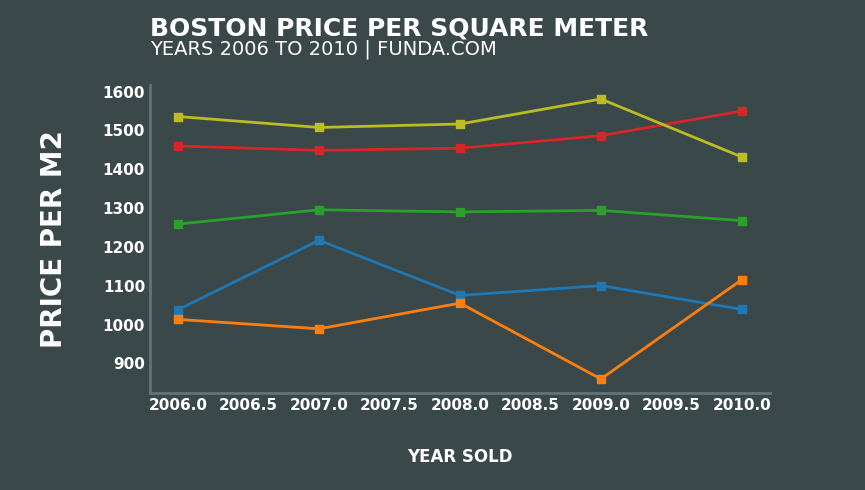

In [162]:
import matplotlib.pyplot as plt 
plt.rcParams.update(style["rcParams"])


(
    plot(df,"YrSold","ppsqm", style = "vox")
    .set_ylabel("PRICE PER M2")
    .set_xlabel("YEAR SOLD")
    .set_title("BOSTON PRICE PER SQUARE METER")
    .set_subtitle("YEARS 2006 TO 2010 | FUNDA.COM")

    .color_by("Neighborhood")
    # .focus_on("CollgCr")
    .set_figsize(8,4)
    .show()
)

In [21]:
d = {"a":"a", "b":"b"}

In [39]:
d.update({"a":4})

In [40]:
d

{'a': 4, 'b': 'b'}

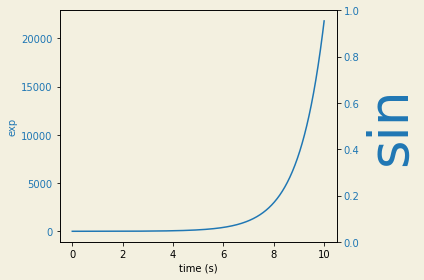

In [40]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('sin', color=color, size=55)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

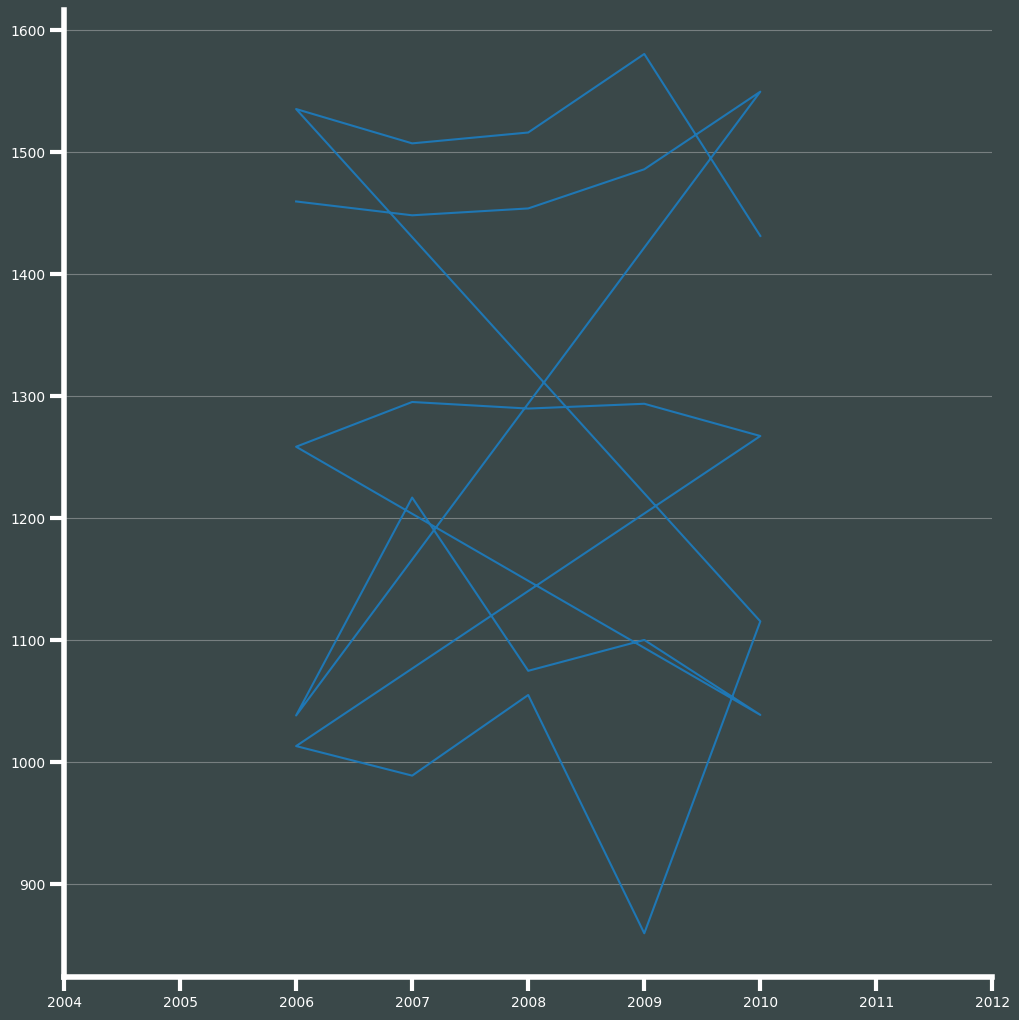

In [99]:
plt.rcParams['figure.figsize'] = [10, 10] # for square canvas
plt.rcParams['figure.subplot.left'] = 0
plt.rcParams['figure.subplot.bottom'] = 0
plt.rcParams['figure.subplot.right'] = 1
plt.rcParams['figure.subplot.top'] = 1


plt.plot(df.YrSold,df.ppsqm)

plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=0)
plt.show()


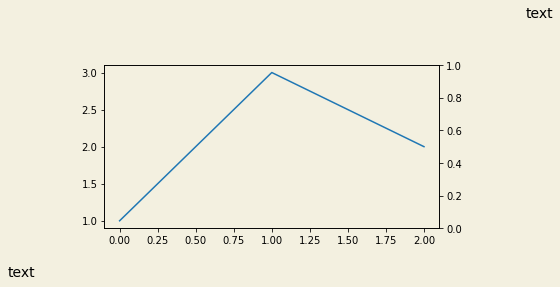

In [76]:
import matplotlib.pyplot as plt

plt.rcParams['axes.facecolor'] = "#F3F0E0"
plt.rcParams['figure.facecolor'] = "#F3F0E0"

plt.figure(figsize = (6,3))

plt.plot([1,3,2])
plt.gca().twinx() 


                                                                               
                                                                               
plt.show()

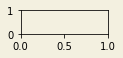

In [68]:
plt.figure()
ax1 = plt.subplot(221)

plt.tight_layout(pad=6, h_pad=10, w_pad=10, rect=None)



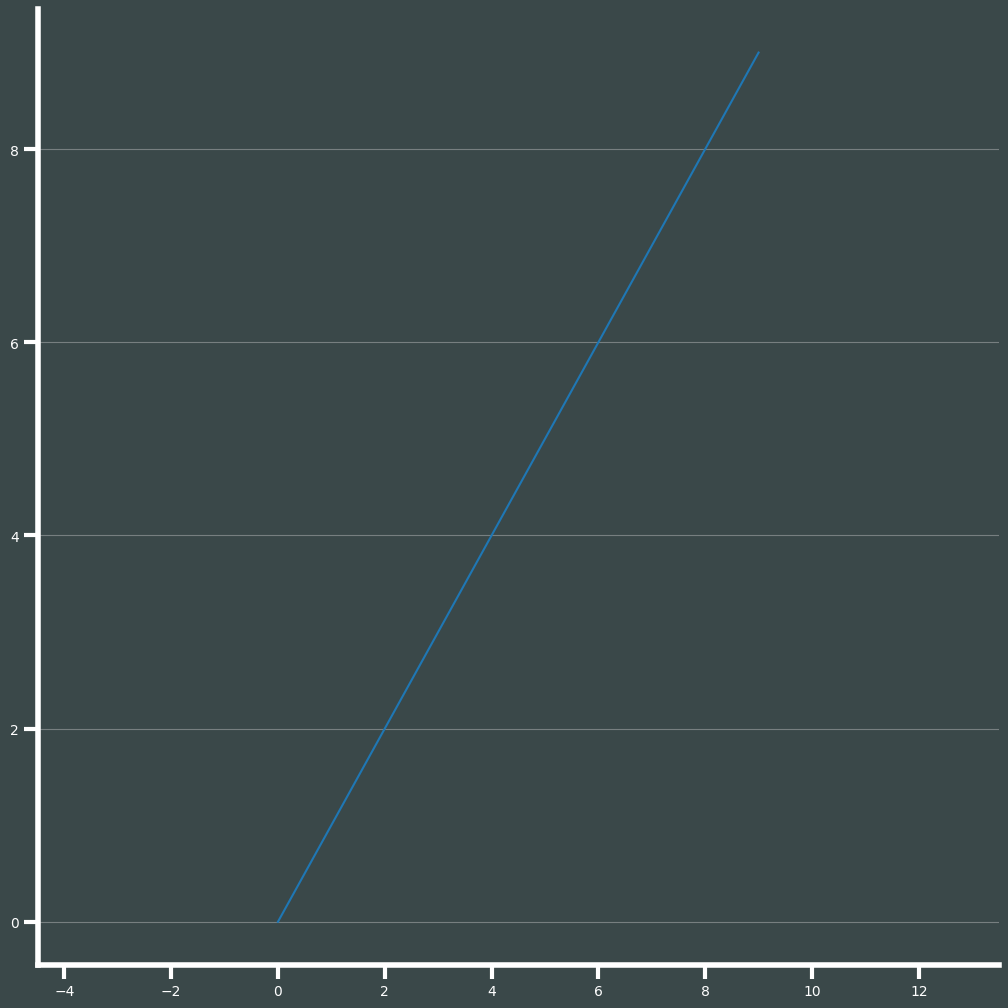

In [94]:

def adjustFigAspect(fig,aspect=1):
    '''
    Adjust the subplot parameters so that the figure has the correct
    aspect ratio.
    '''
    xsize,ysize = fig.get_size_inches()
    minsize = min(xsize,ysize)
    xlim = .4*minsize/xsize
    ylim = .4*minsize/ysize
    if aspect < 1:
        xlim *= aspect
    else:
        ylim /= aspect
    fig.subplots_adjust(left=.5-xlim,
                        right=.5+xlim,
                        bottom=.5-ylim,
                        top=.5+ylim)

fig = plt.figure()
adjustFigAspect(fig,aspect=.5)
ax = fig.add_subplot(111)
ax.plot(range(10),range(10))
plt.rcParams['axes.xmargin'] = 0.5

plt.tight_layout(pad=0.4, w_pad=0.6, h_pad=1.0)

plt.show()

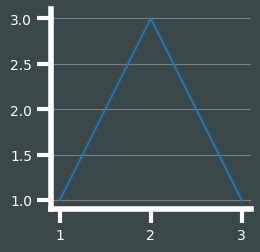

In [84]:
 
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(2,2))
fig.subplots_adjust(hspace = 1, wspace=.1)
ax.plot([1,2,3],[1,3,1]);
plt.show()

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [26]:
import matplotlib.pyplot as plt
plt.rcParamsDefault

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.grid.which':